<center> 
    
# Aiming for the Right Price 
 
## Ames Housing Data and Kaggle Challenge
### Project 2 
    
## Christopher Williams

### DSI 2018
### December 7, 2018




# Problem Statement & Objective: 

### Create a regression model based on the Ames Housing Dataset to predict the price of a house at sale.

We were tasked with creating a regression model based on the Ames, Iowa Housing Dataset to predict the price of houses at sale from 2006 to 2010 that were withheld from us in the test dataset. The datasets are found in this Project 2 Folder Titled: test.csv and train.csv

## Import Needed Libraries

In [2]:
# Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# cross_val_score does K fold validaiton, gives 3 scores back
# cross_val_predict gives back predictions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


## READ IN DATA 

In [3]:
# Set Row and Columns displays
pd.options.display.max_columns = 250 
pd.options.display.max_rows = 999

In [4]:
# Read in train dataset
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# read in test dataset as test_master
test_master = pd.read_csv('datasets/test.csv')

## EDA

In [6]:
# Check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
# check count of null values
train.isnull().sum().sum()

9822

In [8]:
# Check out first 5 columns and reference DataDocumentation.txt for info on all Columns
# Browsed to find more interesting columns
list(train.columns)[:5]

['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage']

In [9]:
# check shape of Train DataFrame
train.shape

(2051, 81)

## Data Visualization without Change to DataSet

#### Use Data Visualization to find outliers, trends, and data patterns to investigate further and to modify, clean or reshape.

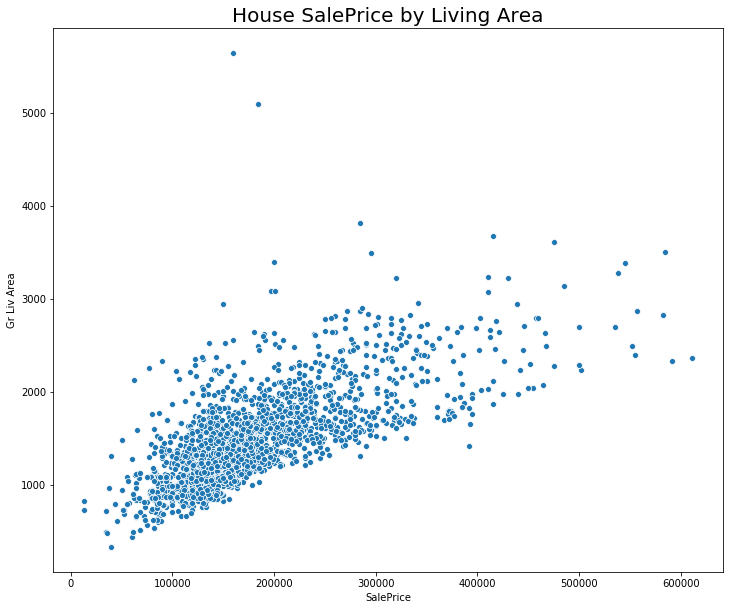

In [10]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='SalePrice', y='Gr Liv Area', data=train)
plt.title('House SalePrice by Living Area', fontsize=20);

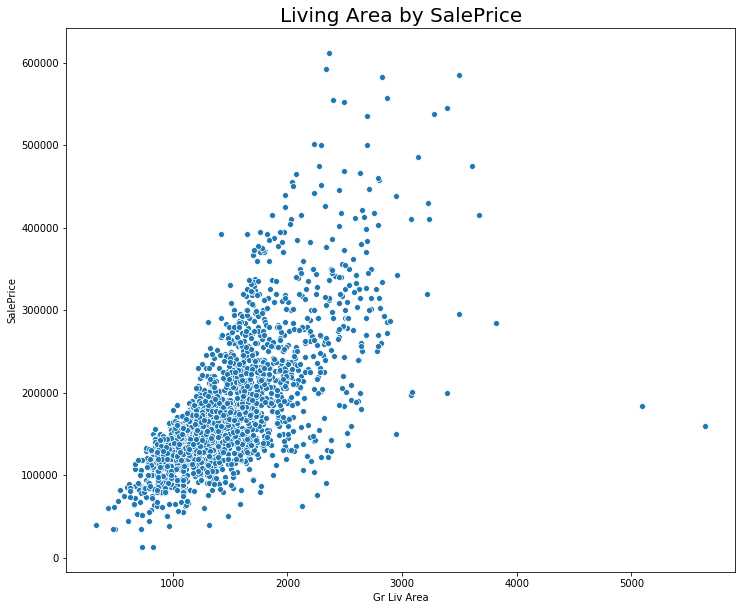

In [11]:
plt.figure(figsize=(12,10))
sns.scatterplot(y='SalePrice', x='Gr Liv Area', data=train)
plt.title('Living Area by SalePrice', fontsize=20);

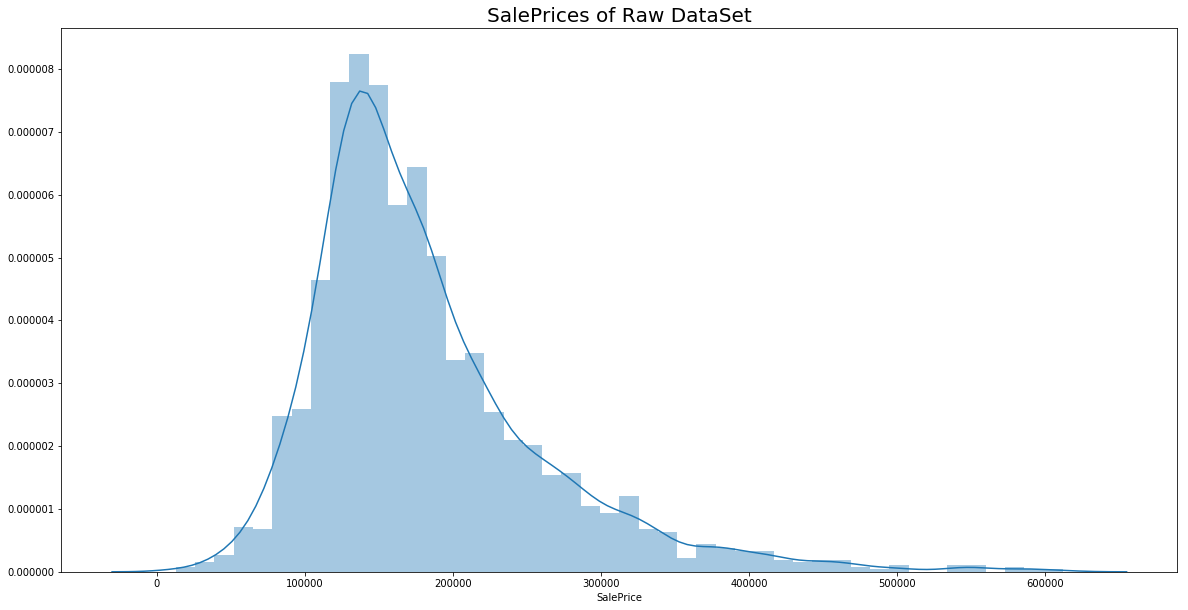

In [12]:
# Histogram of House SalePrices
plt.figure(figsize=(20,10))
sns.distplot(train.SalePrice)
plt.title('SalePrices of Raw DataSet', fontsize=20);

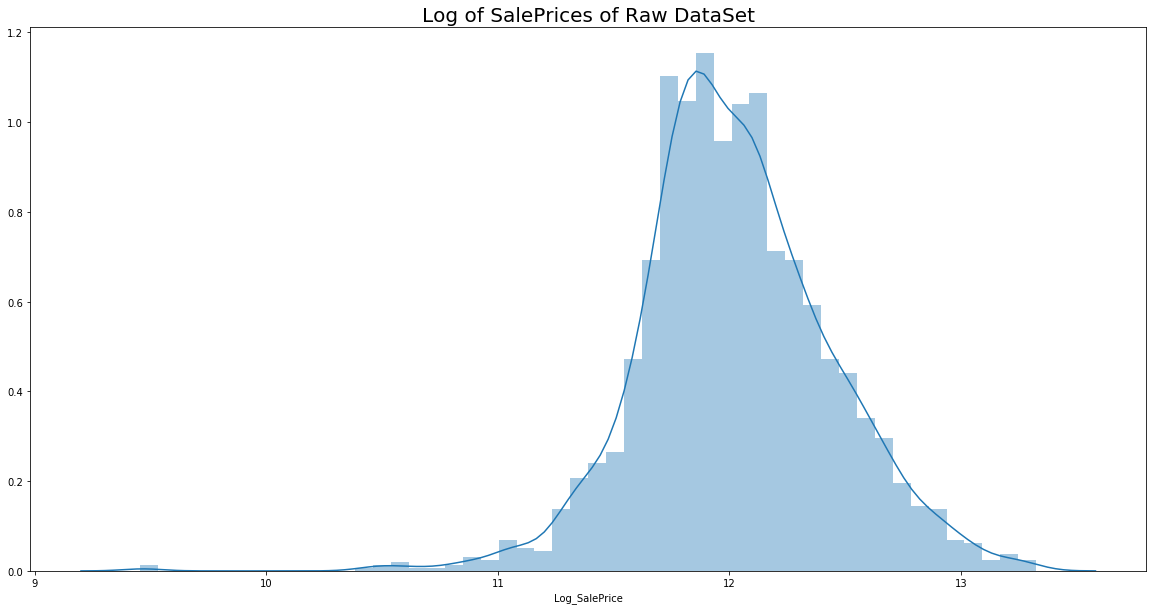

In [13]:
# Histogram of Log of House SalePrices
train['Log_SalePrice'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(20,10))
sns.distplot(train.Log_SalePrice)
plt.title('Log of SalePrices of Raw DataSet', fontsize=20);

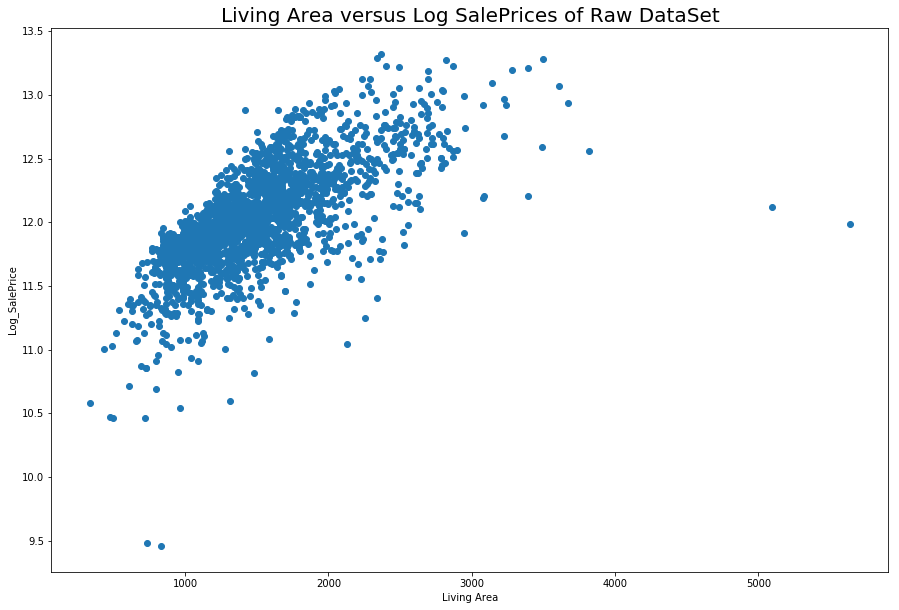

In [14]:
# Can identify Outliers to clean up lower than 9.5 of Log SalePrice and Greater than 5000 SQFT
plt.figure(figsize=(15,10))
plt.scatter(train['Gr Liv Area'], train['Log_SalePrice'])
plt.title('Living Area versus Log SalePrices of Raw DataSet', fontsize='20')
plt.xlabel('Living Area')
plt.ylabel('Log_SalePrice');

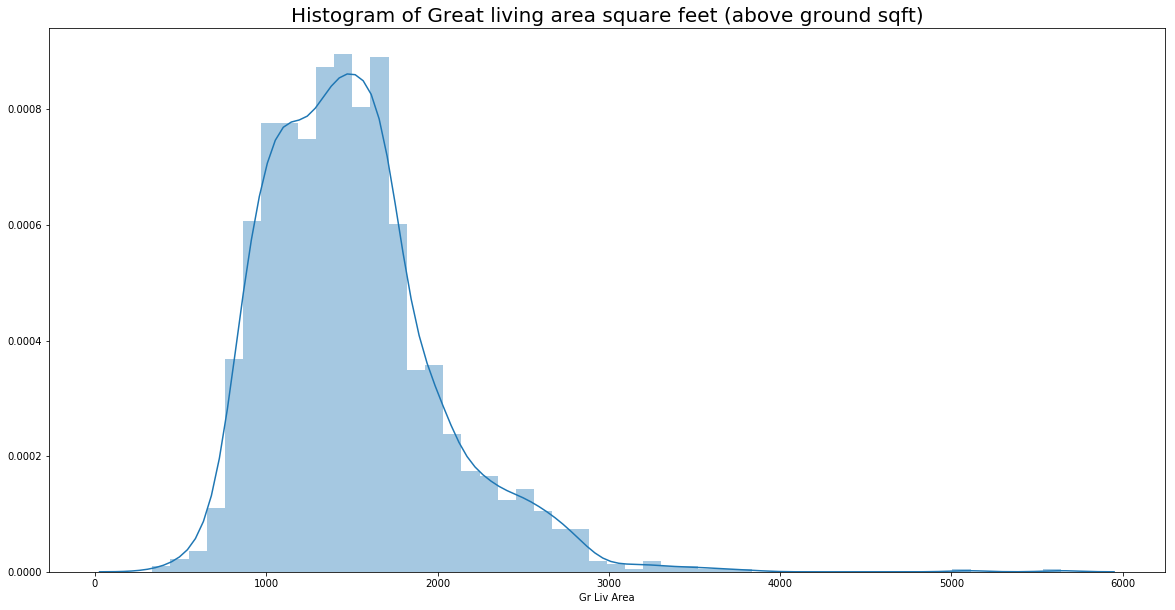

In [15]:
# Histogram of Great living area square feet (above ground sqft)
plt.figure(figsize=(20,10))
sns.distplot(train['Gr Liv Area'])
plt.title('Histogram of Great living area square feet (above ground sqft)', fontsize='20');

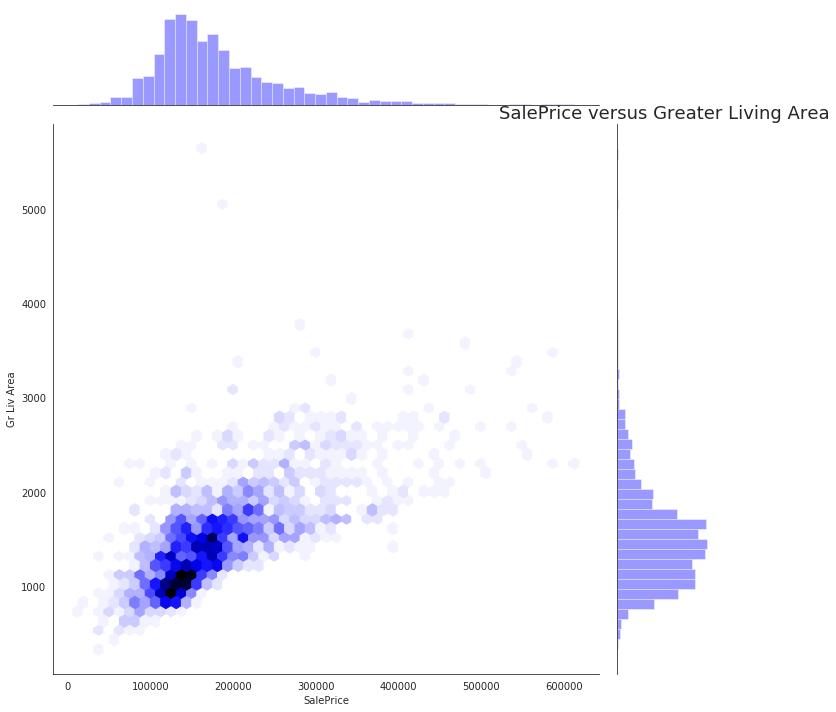

In [16]:
# Jointplot of SalePrice versus Greater Living Area
with sns.axes_style("white"):
    sns.jointplot(x=train['SalePrice'], y=train['Gr Liv Area'], kind="hex", color="b", height=10, alpha=100)
    plt.title('SalePrice versus Greater Living Area',fontsize='18');

## Data Cleanup

In [17]:
# Choose rows that's log is an outlier less than 9.5

train[train['Log_SalePrice'] < 9.5]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Log_SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100,9.480444
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,12789,9.456419


In [18]:
# choose houses that's Living Area is greater than 5000
train[train['Gr Liv Area'] > 5000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Log_SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000,11.982935
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850,12.121881


In [19]:
# Drop the rows that have greater than 5000 sqft and less than log of 9.5 SalePrice

train = train.drop([183, 960, 1628, 1885])

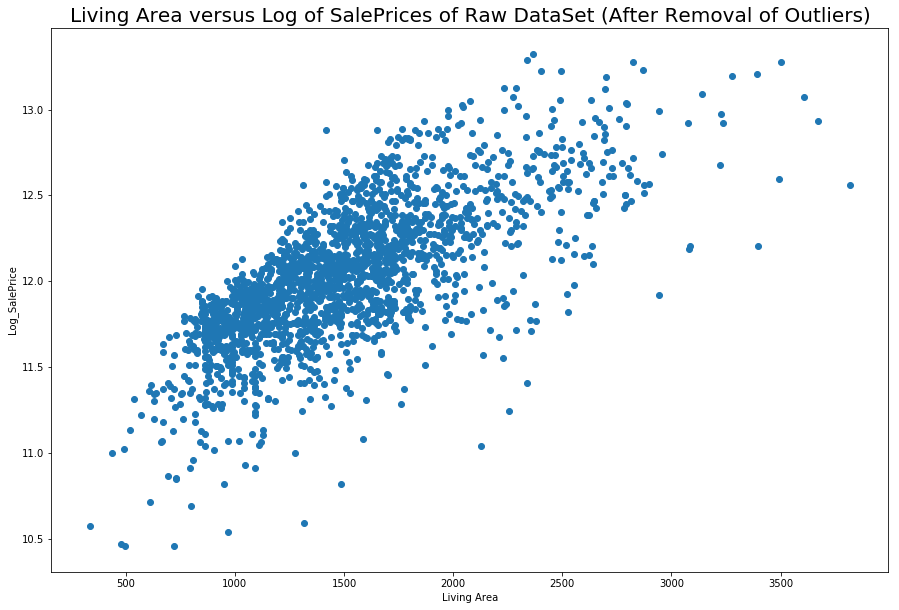

In [20]:
# Replot to see Train Dataframe after those Outliers are cleaned up 
plt.figure(figsize=(15,10))
plt.scatter(train['Gr Liv Area'], train['Log_SalePrice'])
plt.title('Living Area versus Log of SalePrices of Raw DataSet (After Removal of Outliers)', fontsize=20)
plt.xlabel('Living Area')
plt.ylabel('Log_SalePrice');

In [21]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Log_SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,11.779136
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,12.301387


In [22]:
# Drop 'Log_SalePrice' column
train = train.drop(['Log_SalePrice'], axis=1)

In [23]:
# Ordinal Train Column Data Data to be Cleaned Via Cleaning_Function

def Cleaning_Function(df):
    
    df['Lot Shape'] = df['Lot Shape'].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})
    df['Utilities'] = df['Utilities'].map({'AllPub': 4, 'NoSewr':3, 'NoSeWa': 2, 'ELO':1})
    df['Land Slope'] = df['Land Slope'].map({'Gtl':3, 'Mod':2, 'Sev':1})
    df['Exter Qual'] = df['Exter Qual'].map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['Exter Cond'] = df['Exter Cond'].map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['Bsmt Qual'] = df['Bsmt Qual'].fillna(0).map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    df['Bsmt Cond'] = df['Bsmt Cond'].fillna(0).map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna(0).map({'Gd':5, 'Av':4, 'Mn':3, 'No':2, 'NA':0, 0:0})
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna(0).map({'GLQ':6, 'ALQ':5, 'BLQ':3, 'Rec':4, 'LwQ':2, 'Unf':1, 0:0})
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna(0).map({'GLQ':6, 'ALQ':5, 'BLQ':3, 'Rec':4, 'LwQ':2, 'Unf':1, 0:0})
    df['Heating QC'] = df['Heating QC'].map({'Ex':6, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['Electrical'] = df['Electrical'].fillna(0).map({'SBrkr': 4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2, 0:0})
    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['Functional'] = df['Functional'].map({'Typ':25, 'Min1':10, 'Min2':9, 'Mod':8, 'Maj1':5, 'Maj2':4, 'Sev':1, 'Sal':.5})
    df['Fireplace Qu'] = df['Fireplace Qu'].fillna(0).map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    df['Garage Finish'] = df['Garage Finish'].fillna(0).map({'Fin': 10, 'RFn':5, 'Unf':3, 'NA':0, 0:0})
    df['Garage Qual'] = df['Garage Qual'].fillna(0).map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    df['Garage Cond'] = df['Garage Cond'].fillna(0).map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    df['Paved Drive'] = df['Paved Drive'].map({'Y': 5, 'P':2, 'N':1})
    df['Pool QC'] = df['Pool QC'].fillna(0).map({'Ex':7, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    df['Fence'] = df['Fence'].fillna(0).map({'GdPrv':4, 'MnPrv':3, 'GdWo': 4, 'MnWw':3, 'NA':1, 0:1})
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
    df['Garage Cars'] = df['Garage Cars'].fillna(0)
    df['Garage Area'] = df['Garage Area'].fillna(0)
    df['Lot Area'] = df['Lot Area'].fillna(0)
    df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna(0)
    df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)
    df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)
    df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)
    df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
    df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
    df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)

    
    return df

In [24]:
# Create New DataFrame Called: df_train_cleaned to be used from here to end 
# Create New DataFrame Called: test_master_use to be used from here to end 

df_train_cleaned = train[:]
test_master_use = test_master[:]

In [25]:
# Run the new dataframe train_cleaned_df through Cleaning_Function
Cleaning_Function(df_train_cleaned)
Cleaning_Function(test_master_use)

# Check null values after 1st step of data cleaning process
df_train_cleaned.isnull().sum().sum()
test_master_use.isnull().sum().sum()

1703

In [26]:
# Create Dummy Columns for 3 that still have null values ['Garage Type', 'Misc Features', 'Alley']
df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=['Garage Type', 'Misc Feature', 'Alley'], drop_first=True)
test_master_use = pd.get_dummies(test_master_use, columns=['Garage Type', 'Misc Feature', 'Alley'], drop_first=True)


In [27]:
# Check dataframe
df_train_cleaned.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Alley_Pave
0,109,533352170,60,RL,0.0,13517,Pave,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,2,6,533.0,1,0.0,192.0,725.0,GasA,6,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,25.0,0,0,1976.0,5,2.0,475.0,3,3,5,0,44,0,0,0,0,0,1,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,2,6,637.0,1,0.0,276.0,913.0,GasA,6,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,25.0,1,3,1997.0,5,2.0,559.0,3,3,5,0,74,0,0,0,0,0,1,0,4,2009,WD,220000,1,0,0,0,0,0,0,0,0


In [28]:
# Check dataframe
test_master_use.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Othr,Misc Feature_Shed,Alley_Pave
0,2658,902301120,190,RM,69.0,9142,Pave,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,2,1,0,1,0,1020,1020,GasA,4,N,1,908,1020,0,1928,0,0,2,0,4,2,2,9,25.0,0,0,1910.0,3,1,440,1,1,5,0,60,112,0,0,0,0,1,0,4,2006,WD,0,0,0,0,1,0,0,0
1,2718,905108090,90,RL,0.0,9662,Pave,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,2,1,0,1,0,1967,1967,GasA,3,Y,4,1967,0,0,1967,0,0,2,0,6,2,3,10,25.0,0,0,1977.0,10,2,580,3,3,5,170,0,0,0,0,0,0,1,0,8,2006,WD,1,0,0,0,0,0,0,0


In [29]:
# Select all remaining Columns with Object type and create a list of them
# check first 5
list_cols_object_type  = list(df_train_cleaned.select_dtypes(include='object').columns)
list_cols_object_type[:5]

['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood']

In [30]:
# Create Dummy Columns for 3 that still have null values ['Garage Type', 'Misc Features', 'Alley']

df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=list_cols_object_type, drop_first=True)
test_master_use = pd.get_dummies(test_master_use, columns=list_cols_object_type, drop_first=True)


##  Create our features matrix (X_train) and target vector (y_train)

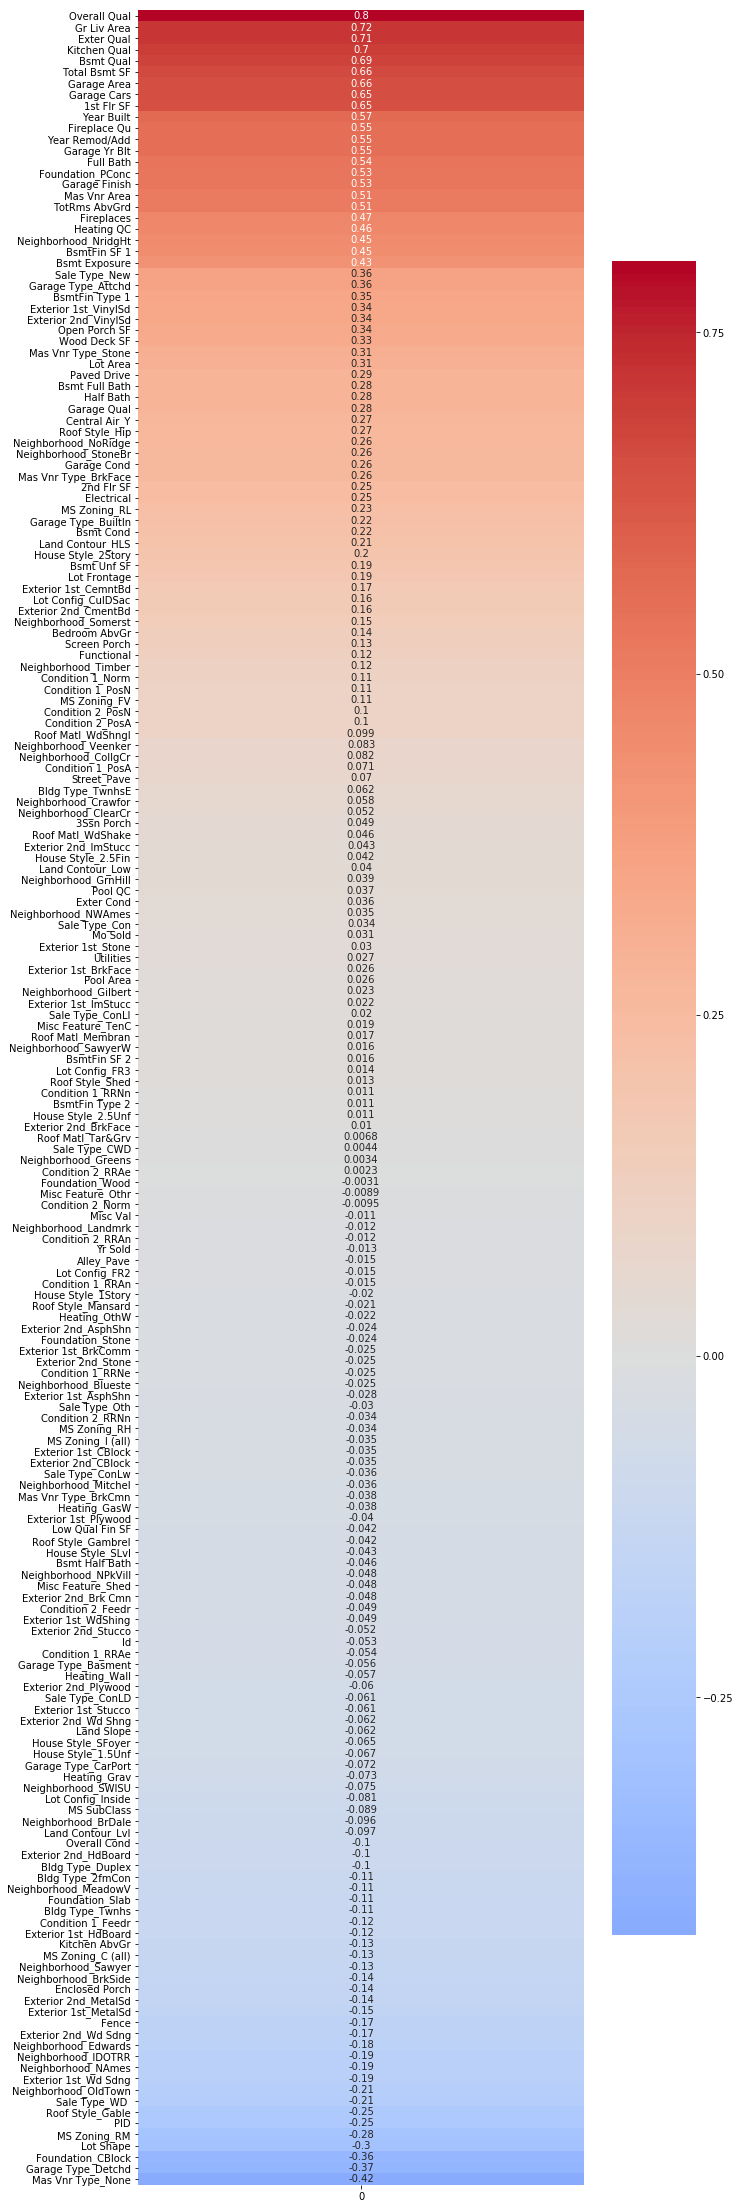

In [31]:
# create features from columns in df_train_cleaned 

df_train_cleaned_corr_list =  df_train_cleaned.corrwith(df_train_cleaned['SalePrice']).sort_values(ascending=False)[1:]
df_train_cleaned.corrwith(df_train_cleaned['SalePrice']).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,40))
sns.heatmap(df_train_cleaned_corr_list.to_frame(), center=0, cmap='coolwarm', annot=True)

### df_train_cleaned_corr_list

df_train_cleaned_corr_list_absolute_values = abs(df_train_cleaned_corr_list).sort_values(ascending=False)
df_train_cleaned_corr_list_absolute_values_column_list = abs(df_train_cleaned_corr_list_absolute_values).index
df_train_cleaned_corr_list_absolute_values_column_list_top_99 = list(df_train_cleaned_corr_list_absolute_values_column_list[:100])

### plt.figure(figsize=(10,14))
### sns.heatmap(df_train_cleaned[feature_cols].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)[1:], annot=True, center=0)

features = [col for col in df_train_cleaned_corr_list_absolute_values_column_list_top_99 if col != 'SalePrice']
features = [x for x in features if x in test_master_use.columns]

#Create X matrix and y target matrix
X_train = df_train_cleaned[features]
y_train = df_train_cleaned['SalePrice']
X_test = test_master_use[features]

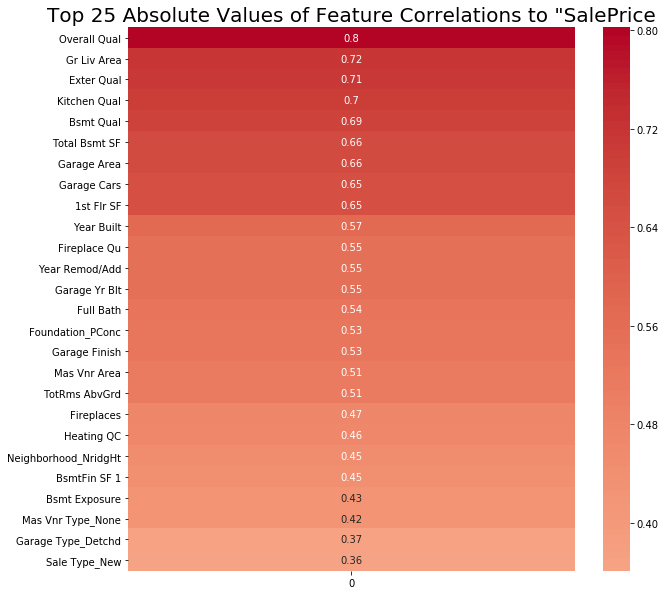

In [32]:
# Plot Heatmap of Top 25 Absolute Values of Feature Correlations to "SalePrice"
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train_cleaned_corr_list_absolute_values[:26].to_frame(), center=0, cmap='coolwarm', annot=True)
plt.title('Top 25 Absolute Values of Feature Correlations to "SalePrice', fontsize=20);

In [33]:
# check X shape
X_train.shape

(2047, 99)

In [34]:
# check y shape
y_train.shape

(2047,)

In [35]:
# # check shape of test_master_use dataframe that will be used 
test_master_use[features].shape

(879, 99)

In [36]:
test_master_use.shape

(879, 187)

In [37]:
# check number of outcomes
len(features)

99

## MODELS TO GET BEST PREDICTIONS OF SALES PRICE

### FIRST BASIC MODEL BASELINE
#### Ridge R2 Baseline Score: 0.748

In [38]:
# This model serves as a baseline on which to score our future models

features_basic = ['Overall Qual', 'Gr Liv Area']
X_train_basic = train[features_basic]
y_train_basic = train['SalePrice']


# Instatiate Model
ridge = Ridge()

# as is now, it's unfit. so need to fit 
ridge.fit(X_train_basic, y_train_basic)

print('Ridge Intercept: ' + str(ridge.intercept_))
print('Ridge Coefficients: ' + str(ridge.coef_))
print('Ridge Best Alpha: ' + str(ridge.alpha))
print('Ridge R2 Score: ' + str(ridge.score(X_train_basic, y_train_basic)))

X_test_basic = test_master[features_basic]
X_test_basic.head()

ridge.predict(X_test_basic)

# now have predictions for all 879 homes
predictions = ridge.predict(X_test_basic)
print('First 5 Predictions: ' + str(predictions[:5,]))

test_master['SalePrice'] = predictions
submission1 = test_master[['Id', 'SalePrice']]

# need Index=False otherwise it will create the index as another column. Only need to submit 2 columns. Id and SalePrice
# submission1.to_csv('cw_ames_basic_model1.csv', index=False)

submission1.head()

Ridge Intercept: -112762.73550812513
Ridge Coefficients: [32581.63651976    63.65234203]
Ridge Best Alpha: 1.0
Ridge R2 Score: 0.7481917246193062
First 5 Predictions: [205448.79903653 175349.60385579 210532.62380106 111760.91417182
 171458.44839465]


,Id,SalePrice
0,2658,205448.799037
1,2718,175349.603856
2,2414,210532.623801
3,1989,111760.914172
4,625,171458.448395


In [39]:
test_master.shape

(879, 81)

## VALIDATE MODEL VIA CROSS VALIDATION OF HOLD-OUT OF ORIGINAL TRAIN DATASET

### Model Prep: Train/test split

In [40]:
X_train_ho, X_test_ho, y_train_ho, y_test_ho = train_test_split(X_train, y_train, random_state=42)

y_train_ho_log = np.log(y_train_ho)
y_test_ho_log = np.log(y_test_ho)

# Instatiate Scaler
ss = StandardScaler()

# Fit scaler
ss.fit(X_train_ho)
X_train_ho_sc = ss.transform(X_train_ho)
X_test_ho_sc = ss.transform(X_test_ho)

# Instatiation Our Models
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

# linear regression Cross Val Score on Regular Data
lr_cv_score = cross_val_score(lr, X_train_ho_sc, y_train_ho, cv=3).mean()
print("Linear Cross Value Score: " + str(lr_cv_score))

# Lasso Cross Val Score on Regular Data
lasso_cv_score = cross_val_score(lasso, X_train_ho_sc, y_train_ho, cv=3).mean()
print("Lasso Cross Value Score: " + str(lasso_cv_score))

# Ridge regression Cross Val Score on Regular Data
ridge_cv_score = cross_val_score(ridge, X_train_ho_sc, y_train_ho, cv=3).mean()
print("Ridge Cross Value Score: " + str(ridge_cv_score))



## Log Scores 

# linear regression Cross Val Score on Log Data
lr_cv_score = cross_val_score(lr, X_train_ho_sc, y_train_ho_log, cv=3).mean()
print("Log Linear Cross Value Score: " + str(lr_cv_score))

# Lasso Cross Val Score on Log Data
lasso_cv_score = cross_val_score(lasso, X_train_ho_sc, y_train_ho_log, cv=3).mean()
print("Log Lasso Cross Value Score: " + str(lasso_cv_score))

# Ridge regression Cross Val Log on Regular Data
ridge_cv_score = cross_val_score(ridge, X_train_ho_sc, y_train_ho_log, cv=3).mean()
print("Log Ridge Cross Value Score: " + str(ridge_cv_score))


Linear Cross Value Score: -6.381041564521318e+21


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


Lasso Cross Value Score: 0.9148664818007796
Ridge Cross Value Score: 0.9148359919604102
Log Linear Cross Value Score: -7.227737768242653e+21
Log Lasso Cross Value Score: 0.9249394216888134
Log Ridge Cross Value Score: 0.9242922033260652


# Modeling on the Hold-Out Train DataSet

## Ridge Model of Hold-Out of Train Dataset Using Log

In [41]:
### RIDGE MODEL OF Hold-Out Train DataSet 
### Using Scaled X_train and X_test 
### Using Log on y_train and y_test


# as is now, it's unfit. so need to fit 
ridge.fit(X_train_ho_sc, y_train_ho_log)
ridge.score(X_train_ho_sc, y_train_ho_log)
ridge.score(X_test_ho_sc, y_test_ho_log)

print('Ridge Ho Intercept: ' + str(ridge.intercept_))
print('Ridge Ho Coefficients (First 3): ' + str(ridge.coef_[:3]))
print('Ridge Best Alpha: ' + str(ridge.alpha_))
print('Ridge Ho Train Score: ' + str(ridge.score(X_train_ho_sc, y_train_ho_log)))
print('Ridge Ho Test Score: ' + str(ridge.score(X_test_ho_sc, y_test_ho_log)))

# now have predictions 
ridge_predictions_ho = np.exp(ridge.predict(X_test_ho_sc))
ridge_predictions_ho
print('First 3 Predictions of Hold Out: ' + str(ridge_predictions_ho[:3]))

r2_score(y_test_ho, ridge_predictions_ho)
print('Ridge Hold out R2 Score: ' + str(r2_score(y_test_ho, ridge_predictions_ho)))

Ridge Ho Intercept: 12.030273799376653
Ridge Ho Coefficients (First 3): [0.0681459  0.06874162 0.01092486]
Ridge Best Alpha: 10.0
Ridge Ho Train Score: 0.9373091442988367
Ridge Ho Test Score: 0.9114470886016095
First 3 Predictions of Hold Out: [291419.41036952 216251.65561468 371868.67481886]
Ridge Hold out R2 Score: 0.9262684211905271


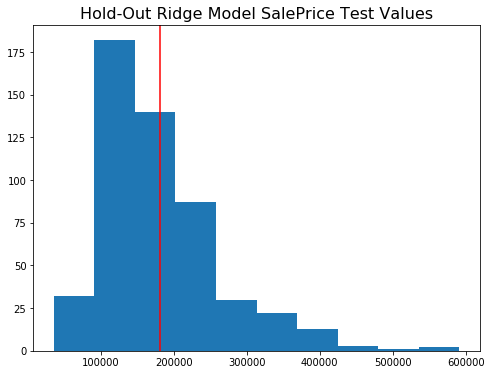

In [42]:
# Histogram of Hold-Out Ridge Model Test Values

# Convert to numpy array to plot
y_test_ho_array = np.array(y_test_ho)

plt.figure(figsize=(8,6))
plt.hist(y_test_ho_array)
plt.axvline(y_test_ho_array.mean(), c='r')
plt.title('Hold-Out Ridge Model SalePrice Test Values', fontsize=16);

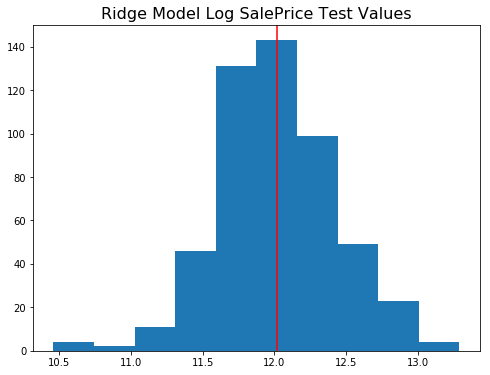

In [43]:
# Histogram of the Ridge Model Log Test Values

# Convert to numpy array to plot
y_test_ho_log_array = np.array(y_test_ho_log)

plt.figure(figsize=(8,6))
plt.hist(y_test_ho_log_array)
plt.axvline(y_test_ho_log_array.mean(), c='r')
plt.title('Ridge Model Log SalePrice Test Values', fontsize=16);

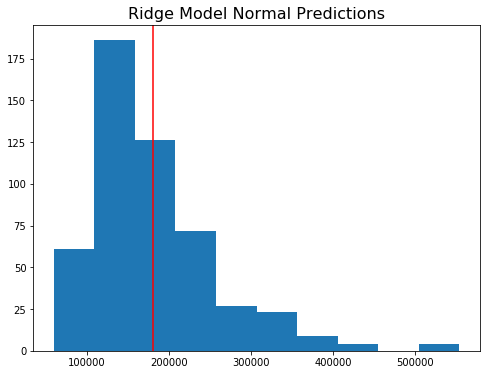

In [44]:
# Histogram of the Ridge Model Predictions
plt.figure(figsize=(8,6))
plt.hist(ridge_predictions_ho)
plt.axvline(ridge_predictions_ho.mean(), c='r')
plt.title('Ridge Model Normal Predictions', fontsize=16);

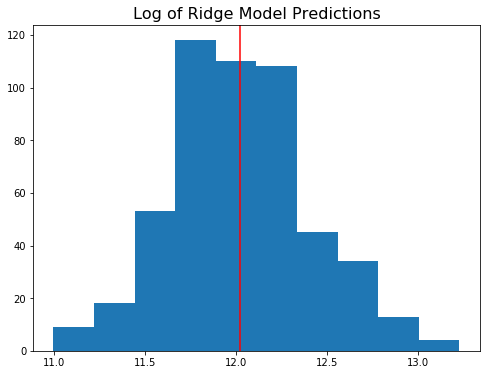

In [45]:
# Log of the Ridge Model Predictions 
plt.figure(figsize=(8,6))
plt.hist(np.log(ridge_predictions_ho))
plt.axvline(np.log(ridge_predictions_ho).mean(), c='r')
plt.title('Log of Ridge Model Predictions', fontsize=16);

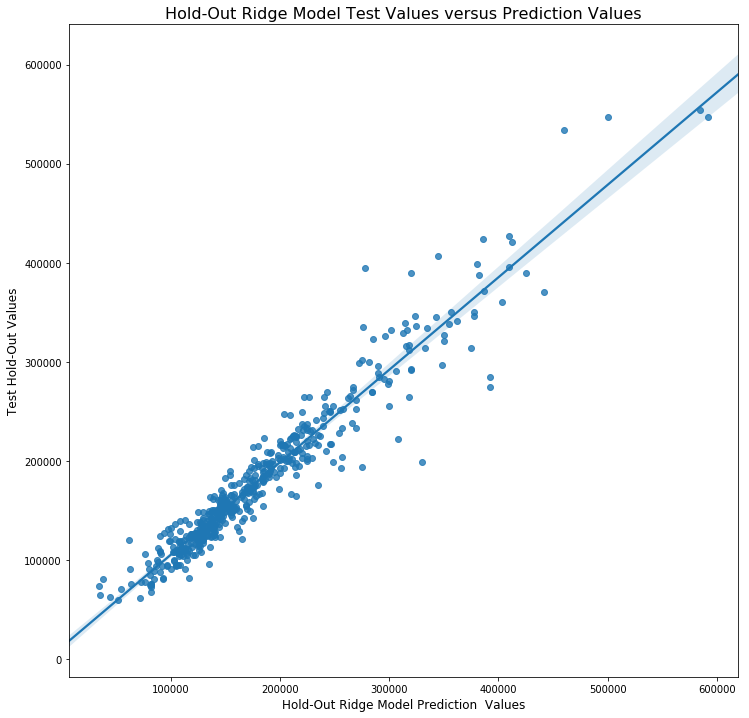

In [46]:
plt.figure(figsize=(12,12))
#plt.scatter(y_test_ho, ridge_predictions_ho)
sns.regplot(y_test_ho, ridge_predictions_ho, data=X_train)
plt.title('Hold-Out Ridge Model Test Values versus Prediction Values', fontsize=16)
plt.ylabel('Test Hold-Out Values', fontsize=12)
plt.xlabel('Hold-Out Ridge Model Prediction  Values', fontsize=12);

## Lasso Model of Hold-Out of Train Dataset Using Log

In [47]:
### Lasso MODEL OF Hold-Out Train DataSet 
### Using Scaled X_train and X_test 
### Using Log on y_train and y_test


# as is now, it's unfit. so need to fit 
lasso.fit(X_train_ho_sc, y_train_ho_log)
lasso.score(X_train_ho_sc, y_train_ho_log)
lasso.score(X_test_ho_sc, y_test_ho_log)

print('Lasso Ho Intercept: ' + str(lasso.intercept_))
print('Lasso Ho Coefficients (First 3): ' + str(lasso.coef_[:3]))
print('Lasso Best Alpha: ' + str(lasso.alpha_))
print('Lasso Ho Train Score: ' + str(lasso.score(X_train_ho_sc, y_train_ho_log)))
print('Lasso Ho Test Score: ' + str(lasso.score(X_test_ho_sc, y_test_ho_log)))


# now have predictions 
lasso_predictions_ho = np.exp(lasso.predict(X_test_ho_sc))
lasso_predictions_ho
print('First 3 Predictions of Hold Out: ' + str(lasso_predictions_ho[:3]))

r2_score(y_test_ho, lasso_predictions_ho)
print('Ridge Hold out R2 Score: ' + str(r2_score(y_test_ho, lasso_predictions_ho)))

Lasso Ho Intercept: 12.030273799376653
Lasso Ho Coefficients (First 3): [0.07286385 0.12491885 0.01303181]
Lasso Best Alpha: 0.0020230309009109334
Lasso Ho Train Score: 0.9338659924180616
Lasso Ho Test Score: 0.9116602152229191
First 3 Predictions of Hold Out: [287637.78043517 219060.69185362 364994.63474181]
Ridge Hold out R2 Score: 0.9278400983216339


## Decision on which Model to Choose

In [48]:
# Ridge Hold-Out Model Scores
print('Ridge Ho Train Score: ' + str(ridge.score(X_train_ho_sc, y_train_ho_log)))
print('Ridge Ho Test Score: ' + str(ridge.score(X_test_ho_sc, y_test_ho_log)))
print('Ridge Hold out R2 Score: ' + str(r2_score(y_test_ho, ridge_predictions_ho)))


# Lasso Hold-Out Model Scores
print('Lasso Ho Train Score: ' + str(lasso.score(X_train_ho_sc, y_train_ho_log)))
print('Lasso Ho Test Score: ' + str(lasso.score(X_test_ho_sc, y_test_ho_log)))
print('Lasso Hold out R2 Score: ' + str(r2_score(y_test_ho, lasso_predictions_ho)))

Ridge Ho Train Score: 0.9373091442988367
Ridge Ho Test Score: 0.9114470886016095
Ridge Hold out R2 Score: 0.9262684211905271
Lasso Ho Train Score: 0.9338659924180616
Lasso Ho Test Score: 0.9116602152229191
Lasso Hold out R2 Score: 0.9278400983216339


### After seeing results of the Hold-Out Models, I decided to try both Ridge and Lasso on the Test Dataset. The R^2 values of Ridge and Lasso were very close at .926 for Ridge and .927 for Lasso.

# Modeling on The Test DataSet

In [49]:
# Set Standard Scaler

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

y_train_log = np.log(y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## Ridge Model on Test DataSet to create Predictions Using Log

## I choose this Ridge Model to Go with for Kaggle Submission

In [50]:
### RIDGE MODEL
### Winner Winner Chicken Dinner

# as is now, it's unfit. so need to fit 
ridge.fit(X_train_sc, y_train_log)

ridge_cv = cross_val_score(ridge, X_train_sc, y_train_log, cv=3)
ridge_cv
ridge_cv.mean()

print('Ridge CV: ' + str(ridge_cv.mean()))
print('Ridge Intercept: ' + str(ridge.intercept_))
print('Ridge Coefficients (First 3): ' + str(ridge.coef_[:3]))
print('Ridge Best Alpha: ' + str(ridge.alpha_))
print('Ridge R2 Score: ' + str(ridge.score(X_train_sc, y_train_log)))


# now have predictions for all 879 homes
ridge_predictions = np.exp(ridge.predict(X_test_sc))
print('First 3 Predictions: ' + str(ridge_predictions[:3]))


# Create submission ready info
test_master_use['SalePrice'] = ridge_predictions
submission_ridge_v1 = test_master_use[['Id', 'SalePrice']]


# Need Index=False otherwise it will create the index as another column. Only need to submit 2 columns. Id and SalePrice
# Create CSV File to Submit By calling below Line 
# submission_ridge_v1.to_csv('cw_ames_ridge_model_v1_100f_log.csv', index=False)

submission_ridge_v1.head()


Ridge CV: 0.9223907903895002
Ridge Intercept: 12.026866920486166
Ridge Coefficients (First 3): [0.06922495 0.07430066 0.00884748]
Ridge Best Alpha: 10.0
Ridge R2 Score: 0.9323050497410345
First 3 Predictions: [134673.93210934 159567.10061393 211797.06062443]


,Id,SalePrice
0,2658,134673.932109
1,2718,159567.100614
2,2414,211797.060624
3,1989,105325.914538
4,625,173755.266648


### Lasso Model on Test DataSet to create Predictions Using Log

In [51]:
## Lasso Model

# Fit Model
lasso.fit(X_train_sc, y_train_log)

# Score Model
lasso_train_score = lasso.score(X_train_sc, y_train_log)

lasso_cv = cross_val_score(lasso, X_train_sc, y_train_log, cv=3)
lasso_cv
lasso_cv.mean()

lasso_intercept = lasso.intercept_
lasso_coef = lasso.coef_
lasso_alpha = lasso.alpha_

print('Lasso CV: ' + str(lasso_cv.mean()))
print('Lasso Intercept: ' + str(lasso_intercept))
print('Lasso Coefficients (First 3): ' + str(lasso_coef[:3]))
print('Lasso Best Alpha: ' + str(lasso_alpha))
print('Lasso R2 Score: ' + str(lasso.score(X_train_sc, y_train_log)))


# now have predictions for all 879 homes
lasso_predictions = np.exp(lasso.predict(X_test_sc))
print('First 3 Predictions: ' + str(lasso_predictions[:3]))


# Create submission ready info
test_master_use['SalePrice'] = lasso_predictions
submission_lasso_v1 = test_master_use[['Id', 'SalePrice']]


# Need Index=False otherwise it will create the index as another column. Only need to submit 2 columns. Id and SalePrice
# Create CSV File to Submit By calling below Line 
# submission_lasso_v1.to_csv('cw_ames_lasso_model_v_99f_log.csv', index=False)

submission_lasso_v1.head()


Lasso CV: 0.9215810617091105
Lasso Intercept: 12.026866920486166
Lasso Coefficients (First 3): [0.07152292 0.11624028 0.00917033]
Lasso Best Alpha: 0.0005827477864645684
Lasso R2 Score: 0.931400985094725
First 3 Predictions: [133790.81076139 160785.60879184 212141.32498695]


,Id,SalePrice
0,2658,133790.810761
1,2718,160785.608792
2,2414,212141.324987
3,1989,104303.651532
4,625,172724.891287


## Comparison of Mean Squared Error of the Final Kaggle Submission and the Ridge Model on the Hold-Out from the Original Train Dataset
### My Final Submission's Mean Squared Error based on the Ranking in Kaggle is 20142 versus a 21647 for the Ridge Hold-Out Model which is 0.069

##### So there is some room for improvement and we'll see how the model performs when tested on the final remaining Kaggle data. 

Mean Squared Error of the 30% trained on
20142.31884

In [52]:
# Difference of My Final Submission's Mean Squared Error based on the Ranking in Kaggle ...
# ... with that of the Hold-Out Set of the Train DataFrame
# 21647 is 

1 - (20142/ 21647)

0.06952464544740611

In [53]:
# Mean Squared Error on Ridge
(mean_squared_error(y_test_ho, ridge_predictions_ho))**.5

21647.48817992363

In [54]:
(mean_squared_error(y_test_ho, lasso_predictions_ho))**.5

21415.524272732473

In [55]:
# Less than 0.01 difference in MSE of the Ridge and Lasso Hold-Out Models of the Original Train Dataset
1 - (21415/ 21647)

0.010717420427772906

### The Coefficients of the Model

#### Create a DataFrame of the Coefficients of the Model and ordered by Rank of weight
#### The below Dataframe is of the rank of Coefficients (First 15 here) which would be used to create an equation to determine SalePrice of a home where the Coefficient is the weight of the feature. 

In [56]:
# Create a DataFrame of the Coefficients of the Model and ordered by Rank of weight
# The below Dataframe is of the rank of Coefficients (First 15 here)

df_rank_of_coef = pd.DataFrame(ridge.coef_, index=features).sort_values(0, ascending=False)
df_rank_of_coef.rename(columns={0:'Coefficients'}, inplace=True)
df_rank_of_coef['Rank'] = df_rank_of_coef['Coefficients'].rank(ascending=0)
df_rank_of_coef['Rank'] = df_rank_of_coef['Rank'].astype(int, errors='raise', inplace=True)
df_rank_of_coef.head(15)

,Coefficients,Rank
Gr Liv Area,0.074301,1
Overall Qual,0.069225,2
Overall Cond,0.049065,3
1st Flr SF,0.046405,4
Year Built,0.044532,5
2nd Flr SF,0.042667,6
Total Bsmt SF,0.040975,7
MS Zoning_RL,0.036662,8
MS Zoning_RM,0.023598,9
Lot Area,0.023063,10


# Scoring Chart of Kaggle Submissions

In [57]:
kaggle_submissions = pd.read_csv('./datasets/kaggle_submissions.csv')
kaggle_submissions

,Submission Number,R^2 Score,Kaggle MSE,Model Type,Number of Features
0,1,0.748192,38974.66733,Ridge,2
1,2,0.905766,29199.64552,Lasso,39
2,3,0.906252,29139.32600,Ridge,39
3,4,0.911524,28917.88712,Ridge,69
4,5,0.926102,26915.51146,Lasso,99
5,6,0.926102,26990.63567,Ridge,99
6,7,0.932305,20142.31884,Ridge,99
7,8,0.931401,20341.89054,Lasso,99


In [58]:
kaggle_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
Submission Number     8 non-null int64
R^2 Score             8 non-null float64
Kaggle MSE            8 non-null float64
Model Type            8 non-null object
Number of Features    8 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 400.0+ bytes


In [59]:
kaggle_submissions.corrwith(kaggle_submissions['Number of Features'])

Submission Number     0.922753
R^2 Score             0.818510
Kaggle MSE           -0.858725
Number of Features    1.000000
dtype: float64

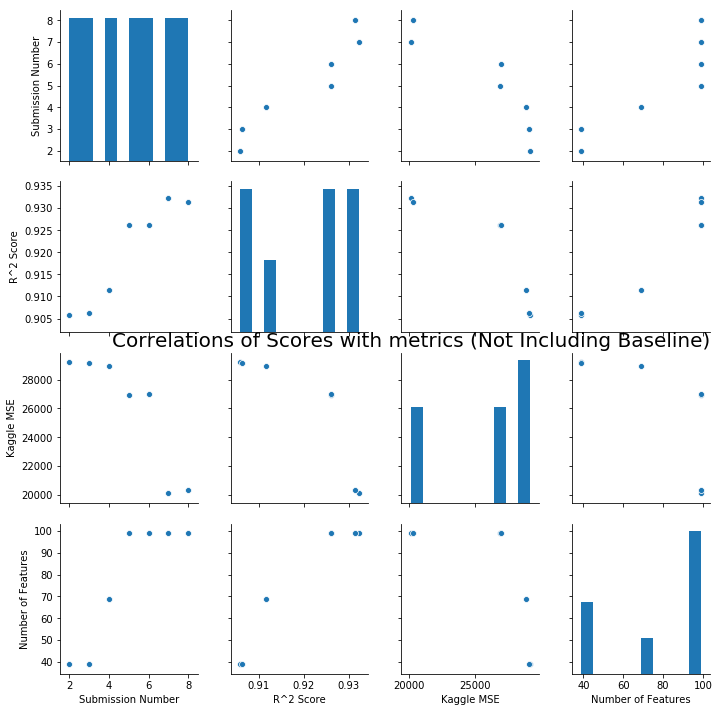

In [60]:
# pairplot of the Correlations of Scores with metrics (Not Including Baseline)
sns.pairplot(kaggle_submissions[1:])
plt.title('Correlations of Scores with metrics (Not Including Baseline)', fontsize=20, loc='right');

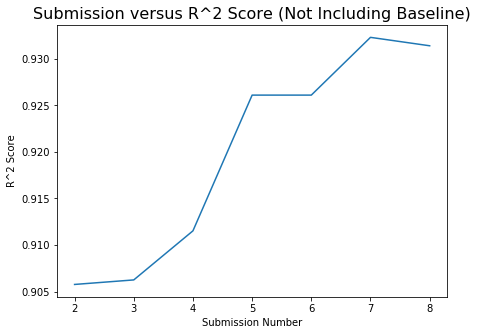

In [62]:
plt.figure(figsize=(7,5))
sns.lineplot(x=kaggle_submissions["Submission Number"][1:], y="R^2 Score", data=kaggle_submissions, dashes=False)

plt.title('Submission versus R^2 Score (Not Including Baseline)', fontsize=16);

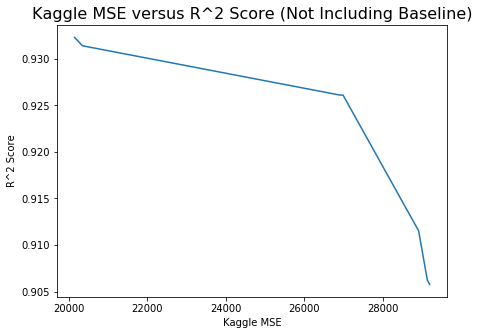

In [63]:
plt.figure(figsize=(7,5))
sns.lineplot(x=kaggle_submissions["Kaggle MSE"][1:], y="R^2 Score", data=kaggle_submissions, dashes=False)
                  
                  
plt.title('Kaggle MSE versus R^2 Score (Not Including Baseline)', fontsize=16);

# Key Takeaways and Conclusion

In regardes to modeling, there are numerous ways to approach modeling a dataset like the Aems Iowa housing data. You can go at it from a simple standpoint and throw features to it one or a few at a time, or you can do a lot of data cleaning and start to through dozens at a time at the different models to see how they perform. I recognise the importance of data and feature cleaning upfront as the modeling would be best to do from a consistent dataframe with features understand if mapped from categorical and ordinal to numerical. 

Looking at the way the Ridge and Lasso models performance as I feed throw features at them steadily increasing from 40, 45, 50, 60, 70 and then threw 99 features at it, I noticed that although the performance may have increased in leaps in bounds from one number of features to the next, that the performance of Ridge versus Lasso was very nuanced and often very small. 

In conclusion the Ridge performanced slightly better than Lasso with more features while Lasso performance better with less features. But more features (99) was my best performing model. Why that is so, is something that I will continue to dig at and my current thought is that Ridge may do a better job of negating more noise when more features are thrown at a model than Lasso does. 

My Key Takeaways are that it is easiest to improve the model performance very significantly in the beginning, but that making additional changes and improving it from an already good model to a great model is difficult. The marginal improvement of performance is difficult to gauge when you do not truly known how the model will performance on a set of unseen data or without a determined, consistent approach. However, knowing why the model improved or worsed, is a critical skill to approach regression modeling of multiple features real world datasets. 